# Exploratory Data Analysis - Multivariate Analysis

In [115]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import widgets, interact
from IPython.display import display

In [67]:
df = pd.read_csv('./../../../data/cleaned_data.csv')

In [68]:
# Load lists of numerical and categorical columns from the static file
with open('./../../../data/statics.json') as f:
    statics = json.load(f)
categorical_columns = statics['categorical_columns']
numerical_columns = statics['numerical_columns']


In [69]:
# Separate out the dataframe intro numerical and categorical dataframe
num_df = df[numerical_columns]
cat_df = df[categorical_columns]

## Correlation

For multivariate, analysis we will begin with correlation. It should be noted that correlation coefficients can only be calculated for numerical variables. It is meaningless to use it for categorical variables. The correlation coefficients can only tell us whether 2 variables are moving together or in opposite direction but in no way it can covey us the about the cause-effect relationship between variables.

In [70]:
# Compute the correlation coefficients
pearson_corr = num_df.corr()
spearman_corr = num_df.corr(method='spearman')

<AxesSubplot:>

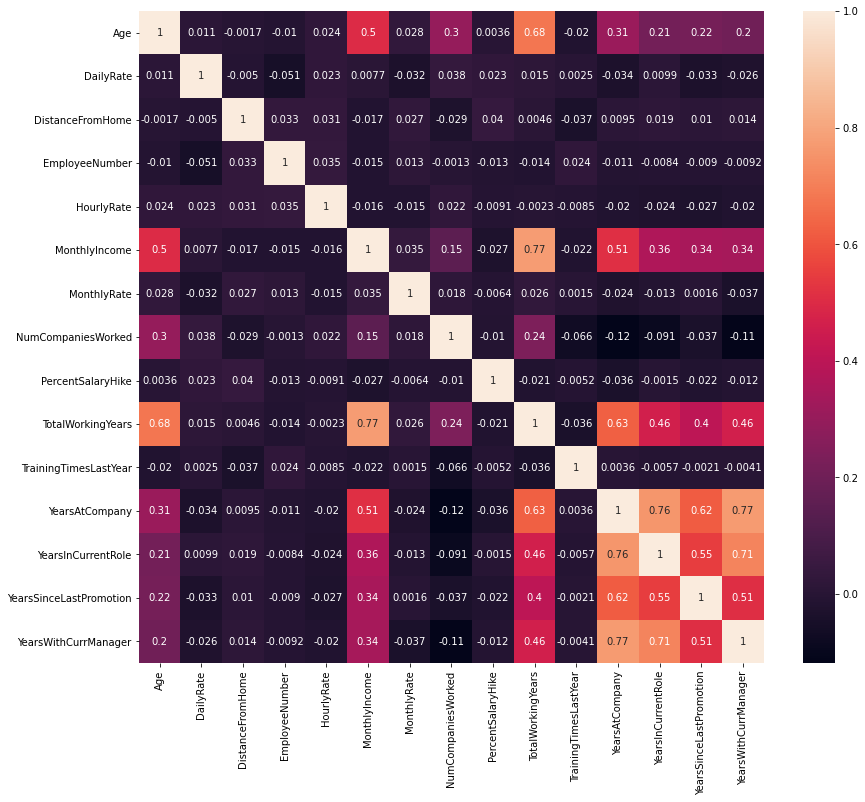

In [77]:
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(pearson_corr, annot=True, ax=ax)

From the above chart it can be noted that there are no variables with extreme negative correlations.  
Total working years is highly correlated with age, monthly income, and years at company. It would be convenient for us to remove this variable but I would like to take this decision while feature selection.
Years at current company, years in current role. years since last promotion and years with current manager are all highly correlated with each other. 

Pearson correlation gives us linear correlation while Spearman correlation gives us non-linear correation. Repeating the above activity with Spearman correlation gives - 

<AxesSubplot:>

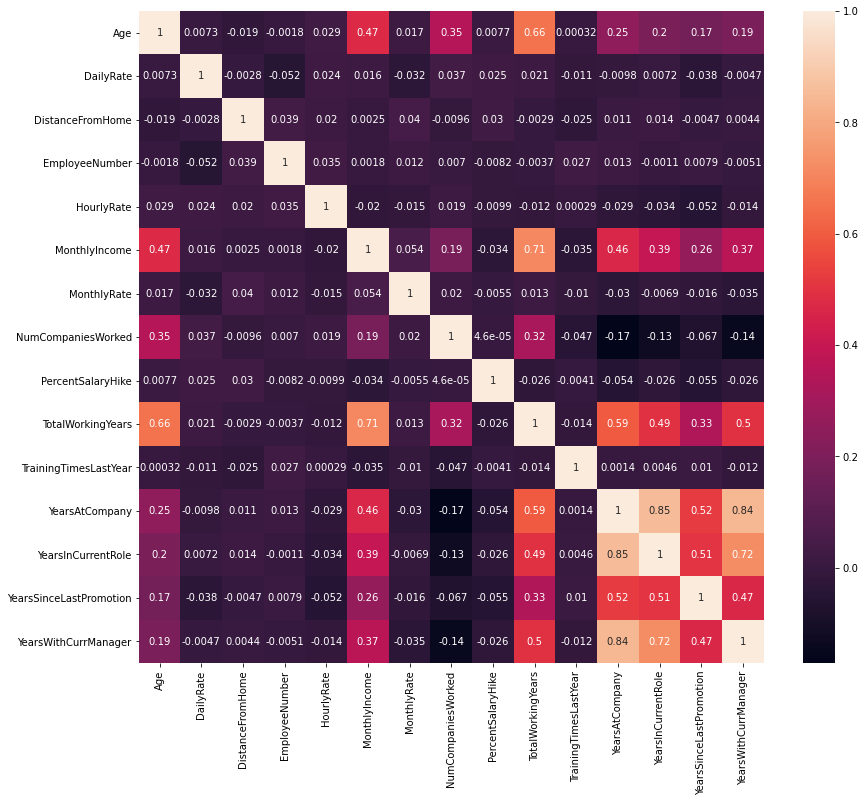

In [79]:
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(spearman_corr, annot=True, ax=ax)

The picture doesn't change. Hence it can safely concluded that features are only linearly correlated.

To understand the correlated features more closely, let us plot the pair plots for them.

In [9]:
sub_df1 = num_df[['Age', 'TotalWorkingYears', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

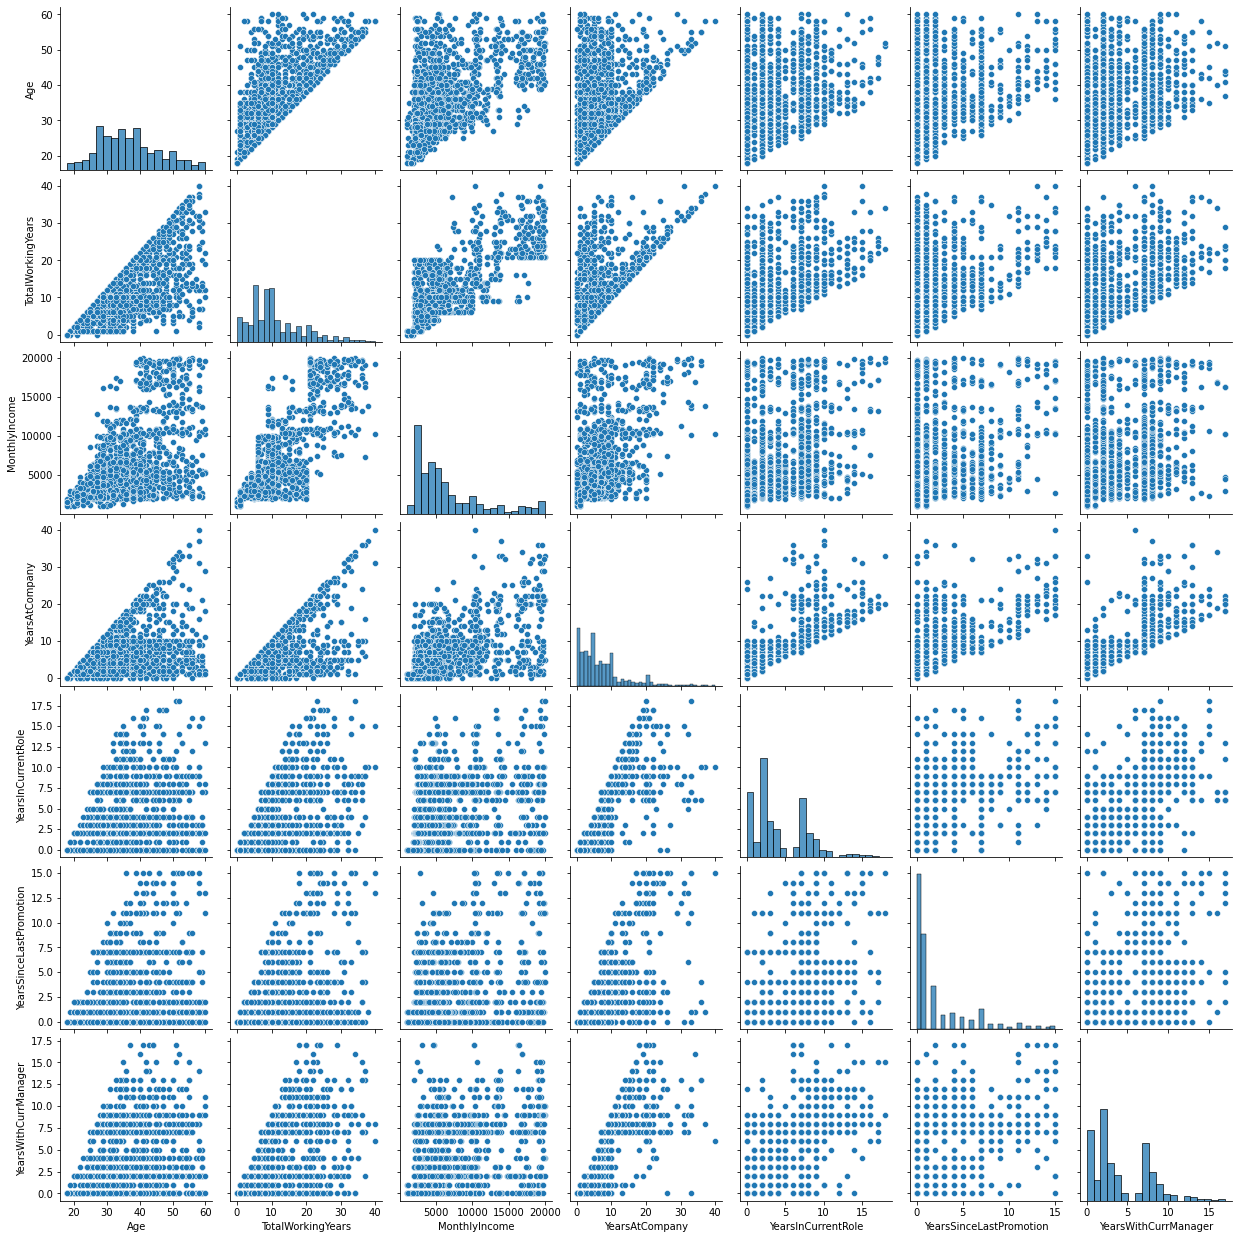

In [80]:
sns.pairplot(sub_df1)

Some people start their job at a later stage, like in their 40s and 50s. But as such age and total working years do show positive corelation. Years at a company, years with curernt manager and years in current role all have high positive corellation amongst them. 

## Relationship with target variable

Let us gauge the available variables with respect to the attrition one by one.

We begin our analysis with the one of the most important factor about how satisifed an employee is in the company that is money.

In [11]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
# Divide the data based on attrition
attr = df[df['Attrition'] == 'Yes']
nattr = df[df['Attrition'] == 'No']

### Numerical

In [120]:
# Create interactive plots

# Create function to respond on change
def function_numerical_attrition(column):
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.histplot(df, x=column, hue='Attrition', stat='probability', ax=ax, common_norm=False)
    plt.show()

interact(function_numerical_attrition, column=numerical_columns)

interactive(children=(Dropdown(description='column', options=('Age', 'DailyRate', 'DistanceFromHome', 'Employe…

<function __main__.function_numerical_attrition(column)>

The probability that people will shift is much more higher for the people between age 20 to 30 than other age groups. People above 30 are very less likely to shift. Distance from home, hourly rate, monthly rate, percentage salary hike, number of times employee was trainined in the last year and years since last promotion does not seem to be significant factors for the decision to leave the company. Employees who exist in the lower bands of monthly salary are more likely to leave the company than their higher bands couterparts. People who have worked in less than or equal to 4 companies are less likely to shift than the people who have worked in more than 4 companies. People with less number of years of working experience and less number of years in the current company are more likely to shift. If people stay in current role for more number of years then the probability that they will leave becomes less then the probability to not leave. If people work under one manager for longer period of time then people are less likely to leave.

### Categorical

We will repeat the above exercise with categorical variables.

In [112]:
# Create interactive plots

def function_categorical_attrition(column):
    fig, ax = plt.subplots(figsize=(18, 8))
    sns.histplot(df, x=column, hue='Attrition', stat='probability', ax=ax, common_norm=False)
    plt.show()

interact(function_categorical_attrition, column=categorical_columns)

interactive(children=(Dropdown(description='column', options=('Attrition', 'BusinessTravel', 'Department', 'Ed…

<function __main__.function_categorical_attrition(column)>

People who travel frequently seems to be more likely to leave the company. People from Sales and Human Resources are more likely to shift. It becomes difficult for people with Masters and Doctorate to make a shift. Interestingly, the same condition holds true for people who just passed their college. The attrition is more with respect to people who studied marketing, technical degree and human resource, while the trend reverses for life sciences, medical and others. People who are satisfied with the company environment are less likely to leave. Females are less likely to make a shift than males. People who find themselves more involved in jobs are less likely to put their papers. Only people who are at lower level i.e. on level 1 on both in heirarchy and stock level options have more probability to leave. Employees who are single and do overtime are more likely to leave the job. Performace rating and work life balance does not affect the decision of the people.